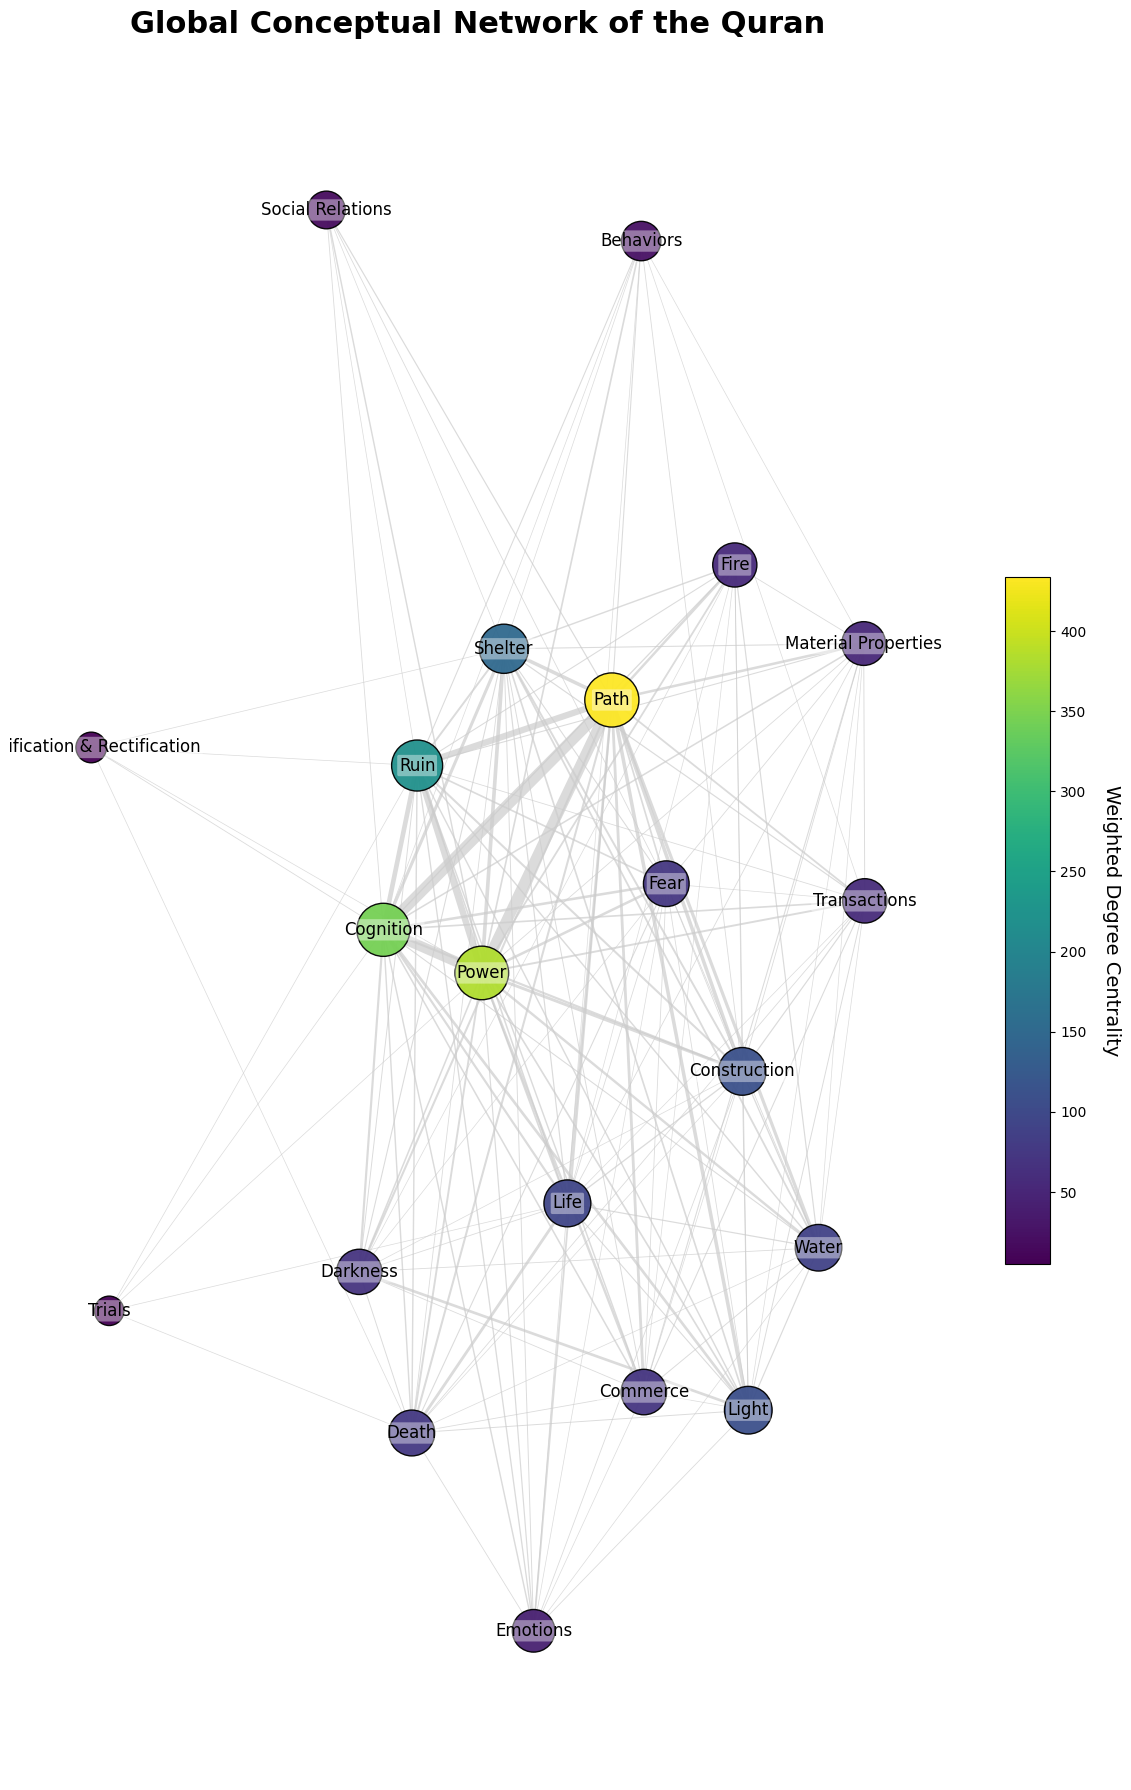


✅ Figure saved successfully: Global_Network_Vertical.png


In [4]:
#@title  **Global Conceptual Network of the Quran**


# --- [الخطوة 0: التثبيت والاستيراد] ---
print("--- [Step 0: Installing and Importing Libraries] ---")
!git clone https://github.com/NoorBayan/Amthal.git
%cd Amthal
from utility import *
from IPython.display import display, HTML, clear_output

!apt-get -qq install -y graphviz libgraphviz-dev pkg-config
!pip install -qq pygraphviz seaborn matplotlib networkx pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
import warnings
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
warnings.simplefilter(action='ignore', category=FutureWarning)
print("Libraries ready.\n")


# --- [الخطوة 1: تحميل وتجهيز البيانات] ---
print("--- [Step 1: Loading Data] ---")
# ⚠️⚠️⚠️  الرجاء التأكد من أن هذا المسار صحيح في بيئتك
INSTANCES_FILE_PATH = '/content/Amthal/data/processed/instances.csv'
try:
    df = pd.read_csv(INSTANCES_FILE_PATH, sep='\t', encoding='utf-16')
    df['Dominant_Concept']=[Dominant_Concept_dic[i]['en'] for i in df.Dominant_Concept]

    print(f"Data loaded successfully. Found {len(df)} instances.\n")
except FileNotFoundError:
    print(f"⚠️ ERROR: File not found at '{INSTANCES_FILE_PATH}'. Please check the path and try again.")
    exit()


# --- [الخطوة 2: بناء الشبكة] ---
print("--- [Step 2: Building Network] ---")
grouped = df.groupby(['Sura_No', 'Aya_No'])['Dominant_Concept'].apply(list)
edges = [tuple(sorted(combo)) for concepts in grouped if len(concepts) > 1 for combo in combinations(set(concepts), 2)]
edge_weights = pd.DataFrame(edges, columns=['source', 'target']).value_counts().reset_index(name='weight')
G = nx.from_pandas_edgelist(edge_weights, 'source', 'target', ['weight'])
print("Network built successfully.\n")

print("--- [START] VERIFICATION REPORT FOR SECTION 4.1 ---")

# (1) التحقق من الإحصائيات الأساسية المذكورة في النص
num_instances = len(df)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print("\n--- [1] Core Statistics Verification ---")
print(f"Total Figurative Instances in Corpus: {num_instances}")
print(f"Number of Conceptual Nodes (V):       {num_nodes}")
print(f"Number of Weighted Edges (E):         {num_edges}")
print(f"Network Density:                      {density:.4f}") # طباعة بأربع خانات عشرية للدقة

# (2) التحقق من الترابط
is_connected = nx.is_connected(G)
num_components = nx.number_connected_components(G)

print("\n--- [2] Connectivity Verification ---")
print(f"Is the network fully connected?         {is_connected}")
print(f"Number of connected components:         {num_components}")
if is_connected:
    print("✅ The network forms a single cohesive component without isolated subgraphs.")
else:
    print(f"⚠️ WARNING: The network is fragmented into {num_components} components.")

# (3) معلومات إضافية مفيدة (غير مذكورة في النص ولكنها جيدة للتحقق)
avg_degree = np.mean(list(dict(G.degree()).values()))
avg_weighted_degree = np.mean(list(dict(G.degree(weight='weight')).values()))

print("\n--- [3] Additional Useful Metrics ---")
print(f"Average Degree (unweighted):          {avg_degree:.2f}")
print(f"Average Weighted Degree (Strength):   {avg_weighted_degree:.2f}")

print("\n--- [END] VERIFICATION REPORT ---\n")


# --- [الخطوة 3: حساب الخصائص البصرية] ---
print("--- [Step 3: Calculating Visual Properties] ---")
degrees = dict(G.degree(weight='weight'))
node_sizes = [np.log(v + 1) * 250 for v in degrees.values()]
weights = nx.get_edge_attributes(G, 'weight')
min_width, max_width = 0.5, 8.0
edge_widths = [min_width + (w - min(weights.values())) / (max(weights.values()) - min(weights.values())) * (max_width - min_width) for w in weights.values()]
print("Visual properties calculated.\n")

# --- [الخطوة 4: تحديد مواقع العقد (Layout)] ---
print("--- [Step 4: Calculating Layout] ---")
pos = graphviz_layout(G, prog='neato', args='-Gsep=1.5 -Gsplines=true -Goverlap=false')
print("Layout calculated.\n")

# --- [الخطوة 5: الرسم] ---
print("--- [Step 5: Generating Plot] ---")
fig, ax = plt.subplots(figsize=(12, 18), facecolor='white')
ax.set_title('Global Conceptual Network of the Quran', fontsize=22, fontweight='bold', pad=20)

nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="#cccccc", alpha=0.7, ax=ax)

node_colors = list(degrees.values())
nodes_viz = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.95, ax=ax)
nodes_viz.set_edgecolor('black')
nodes_viz.set_linewidth(1.0)

sorted_degrees = sorted(degrees.items(), key=lambda item: item[1], reverse=True)
top_n = 8
top_nodes_names = [node for node, degree in sorted_degrees[:top_n]]
labels = {node: node for node in G.nodes()} # إظهار كل التسميات
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black', bbox=dict(facecolor='white', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.1'))
print("Plot drawn.\n")


# --- [الخطوة 6: التنسيق النهائي والحفظ] ---
print("--- [Step 6: Finalizing and Saving] ---")
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, aspect=15)
cbar.set_label('Weighted Degree Centrality', rotation=270, labelpad=25, fontsize=14)
plt.tight_layout()
plt.savefig('Global_Network_Vertical.png', dpi=300, bbox_inches='tight')
#########
clear_output()
plt.show()

print("\n✅ Figure saved successfully: Global_Network_Vertical.png")